<a href="https://colab.research.google.com/github/MrCherveN/Machine-Learning--4-0_HomeTasks/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-4'

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-4" (use force=True to force download)


In [5]:
data_dir = '/content/bank-customer-churn-prediction-dlu-course-c-4'

In [6]:
train_csv = data_dir + '/train.csv'

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv(train_csv)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [10]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Exited'])

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [11]:
target_col = 'Exited'
input_cols = [col for col in train_df.columns if col not in [target_col, 'id', 'CustomerId', 'Surname']]


In [12]:
print(input_cols)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [13]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [14]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [15]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11250 entries, 8263 to 1292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      11250 non-null  float64
 1   Geography        11250 non-null  object 
 2   Gender           11250 non-null  object 
 3   Age              11250 non-null  float64
 4   Tenure           11250 non-null  float64
 5   Balance          11250 non-null  float64
 6   NumOfProducts    11250 non-null  float64
 7   HasCrCard        11250 non-null  float64
 8   IsActiveMember   11250 non-null  float64
 9   EstimatedSalary  11250 non-null  float64
dtypes: float64(8), object(2)
memory usage: 966.8+ KB


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [16]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
print(categorical_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

***Важливо***:

- Колонки  'id', 'CustomerId', 'Surname' я виключив ще на этапі формування тренувального та валідаціного імпута для моделі (завдання №2). Вважаю, що ці ознаки будуть нерелевантнми для моделі.

In [17]:
#заповнення пропущених значень, якщо вони є
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11250 entries, 8263 to 1292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11250 non-null  int64  
 1   CustomerId       11250 non-null  float64
 2   Surname          11250 non-null  object 
 3   CreditScore      11250 non-null  float64
 4   Geography        11250 non-null  object 
 5   Gender           11250 non-null  object 
 6   Age              11250 non-null  float64
 7   Tenure           11250 non-null  float64
 8   Balance          11250 non-null  float64
 9   NumOfProducts    11250 non-null  float64
 10  HasCrCard        11250 non-null  float64
 11  IsActiveMember   11250 non-null  float64
 12  EstimatedSalary  11250 non-null  float64
 13  Exited           11250 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.3+ MB


In [18]:
train_df[numeric_cols].isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


***Висновок:***
- Хоча зараз у тренувальному та валідаційному наборах пропущених даних немає, потрібно зроби заповнення пропущених значень, на випадок їх появи в тестувальному наборі.

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
# заповнення проущених числових даних
imputer_num = SimpleImputer(strategy = 'median')
imputer_num.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = imputer_num.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer_num.transform(val_inputs[numeric_cols])

In [21]:
list(imputer_num.statistics_)

[np.float64(661.0),
 np.float64(37.0),
 np.float64(5.0),
 np.float64(0.0),
 np.float64(2.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(123587.945)]

Аналогічно зробимо для категоріальних змінних. Заповнювати будемо зі стратегією найчастіше вживаного значення.

In [22]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(train_inputs[categorical_cols])
train_inputs[categorical_cols] = imputer_cat.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer_cat.transform(val_inputs[categorical_cols])

In [23]:
list(imputer_cat.statistics_)

['France', 'Male']

In [24]:
display(train_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


In [25]:
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1855,543.0,France,Male,29.0,9.0,119688.81,1.0,0.0,0.0,55815.62
1273,598.0,Germany,Male,41.0,3.0,123863.64,1.0,1.0,0.0,176868.89
5414,621.0,France,Male,31.0,7.0,0.00,1.0,1.0,1.0,150242.44
10923,597.0,France,Male,56.0,3.0,0.00,4.0,1.0,0.0,102936.71
5835,749.0,Spain,Female,42.0,5.0,0.00,1.0,1.0,1.0,181794.86


Тепер проведемо масштабування числових ознак.

In [26]:
#інформація по вхідному набору даних
train_df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,658.990133,37.688267,5.023467,42952.888064,1.589689,0.792000,0.491111,117904.955965
std,72.120043,8.143175,2.781807,59923.385440,0.531688,0.405895,0.499943,45553.025877
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83155.870000
50%,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123587.945000
75%,709.000000,42.000000,7.000000,109863.192500,2.000000,1.000000,1.000000,156774.940000
max,850.000000,72.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [27]:
train_inputs[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,658.990133,37.688267,5.023467,42952.888064,1.589689,0.792000,0.491111,117904.955965
std,72.120043,8.143175,2.781807,59923.385440,0.531688,0.405895,0.499943,45553.025877
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83155.870000
50%,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123587.945000
75%,709.000000,42.000000,7.000000,109863.192500,2.000000,1.000000,1.000000,156774.940000
max,850.000000,72.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


Як бачимо по статистиці вище, дані в числових колонках вказані в різних масштабах, що буде мати негативний вплив на модель - окремі колонки будуть мати непропорційний вплив на втрати моделі.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [30]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [31]:
train_inputs[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,0.544129,0.364598,0.502347,0.204764,0.196563,0.792000,0.491111,0.589523
std,0.172124,0.150800,0.278181,0.285666,0.177229,0.405895,0.499943,0.227787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410501,0.259259,0.300000,0.000000,0.000000,1.000000,0.000000,0.415761
50%,0.548926,0.351852,0.500000,0.000000,0.333333,1.000000,0.000000,0.617941
75%,0.663484,0.444444,0.700000,0.523738,0.333333,1.000000,1.000000,0.783892
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
display(train_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109


In [33]:
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1855,0.267303,France,Male,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047
1273,0.398568,Germany,Male,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371
5414,0.453461,France,Male,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226
10923,0.396181,France,Male,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675
5835,0.758950,Spain,Female,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003


Тепер проведемо кодування категоріальних ознак.

In [34]:
train_df[categorical_cols].value_counts()

Geography  Gender
France     Male      3979
           Female    2774
Spain      Male      1434
           Female    1052
Germany    Male      1036
           Female     975
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [37]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [38]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [39]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [40]:
display(train_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


In [41]:
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,0.267303,France,Male,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,Germany,Male,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,France,Male,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,France,Male,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,Spain,Female,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [42]:
import os

In [43]:
os.makedirs('./parquet', exist_ok=True)

In [44]:
train_inputs.to_parquet('./parquet/train_inputs.parquet')
train_targets.to_frame().to_parquet('./parquet/train_targets.parquet')
val_inputs.to_parquet('./parquet/val_inputs.parquet')
val_targets.to_frame().to_parquet('./parquet/val_targets.parquet')

In [45]:
os.listdir('./parquet')

['val_targets.parquet',
 'train_targets.parquet',
 'train_inputs.parquet',
 'val_inputs.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression(solver='liblinear')

In [48]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [49]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [50]:
print(numeric_cols + encoded_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [51]:
print(model.coef_.tolist())

[[-0.8265458309922971, 8.158907923853011, -0.08727744139826082, -1.090864444543187, -3.9309810901591273, -0.1805454895872605, -1.2435569332713146, 0.1805147129863729, -0.9721317214808108, 0.6048195654521946, -1.0536746607044705, -0.2714255280804969, -1.1495612886527176]]


In [52]:
print(model.intercept_)

[-1.42098682]


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [53]:
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# модифікуємо функції з лекції
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    f1_score_ = f1_score(targets, preds, pos_label=1)
    print(f"F1 score {name}: {f1_score_:.2f}")

    cf = confusion_matrix(targets, preds, normalize='true')

    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix (normalized)'.format(name))
    plt.show();

    y_pred_proba = model.predict_proba(inputs)
    y_pred_proba_1 = y_pred_proba[:, 1]
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba_1, pos_label=1)
    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    print(f'\nAUROC for {name}: {roc_auc:.2f}')

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.show();

    return preds, y_pred_proba

F1 score Training: 0.64


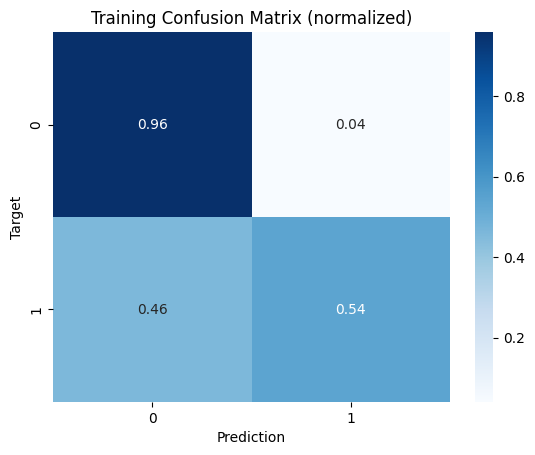


AUROC for Training: 0.88


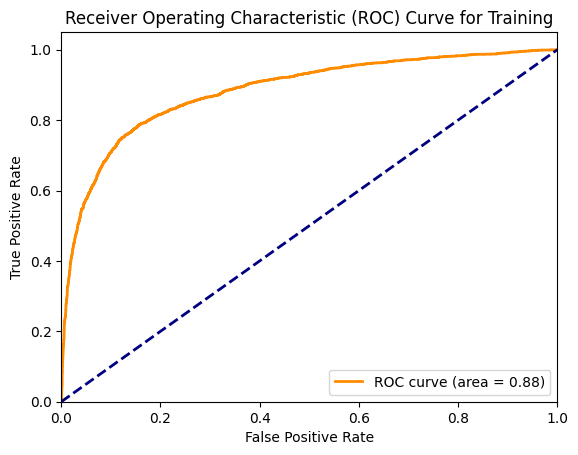

In [55]:
train_preds, train_probs = predict_and_plot(X_train, train_targets, 'Training')

In [56]:
confusion_matrix(train_targets, train_preds)

array([[8600,  361],
       [1048, 1241]])

F1 score Validation: 0.63


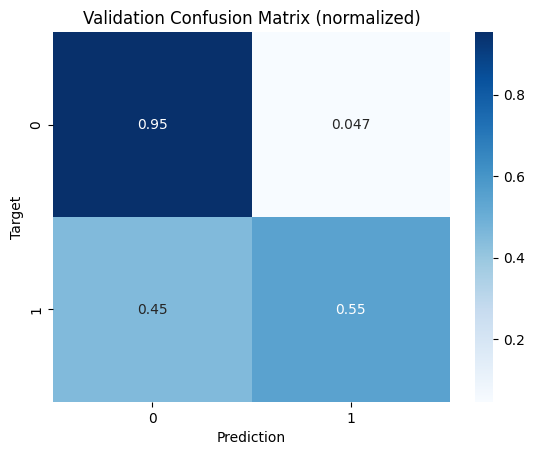


AUROC for Validation: 0.88


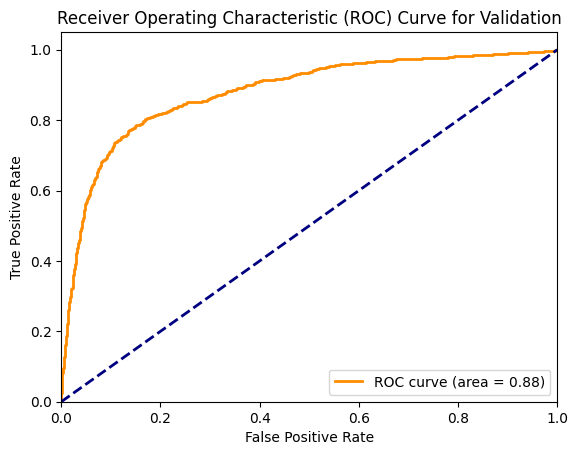

In [57]:
val_preds,val_probs = predict_and_plot(X_val, val_targets, 'Validation')

In [58]:
confusion_matrix(val_targets, val_preds)

array([[2847,  140],
       [ 344,  419]])

***Висновок:***
- Побудована модель є задовільною з високим потенціалом. Вона має перспективи до покращення за рахунок додаткових налаштувань (наприклад, налаштуванням оптимального порогу класифікації замість значення 0.5).

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
def predict_majority(inputs):
  majority_val = train_targets.value_counts().index[0]
  return np.full(len(inputs), majority_val)

In [61]:
accuracy_train_majority = accuracy_score(train_targets, predict_majority(train_inputs))
print("Accuracy train_majority : {:.2f}%".format(accuracy_train_majority * 100))

accuracy_val_majority = accuracy_score(val_targets, predict_majority(val_inputs))
print("Accuracy val_majority : {:.2f}%".format(accuracy_val_majority * 100))

Accuracy train_majority : 79.65%
Accuracy val_majority : 79.65%


In [62]:
accuracy_train_pred = accuracy_score(train_targets, train_preds)
print("Accuracy train_pred : {:.2f}%".format(accuracy_train_pred * 100))

accuracy_val_pred = accuracy_score(val_targets, val_preds)
print("Accuracy val_pred : {:.2f}%".format(accuracy_val_pred * 100))

Accuracy train_pred : 87.48%
Accuracy val_pred : 87.09%


***Висновок:***

- Результати показують, що побудовано мною логістична модель є точнішою за модель з мажоритарним прогнозом на валідаційних даних. Тобто модель є задовільною та має перспективи до покращення за рахуно налаштувань (наприклад,  налаштуванням оптимального порогу класифікації замість значення 0.5).

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [63]:
import joblib

In [64]:
bank_customer_churn_prediction = {
    'model': model,
    'imputer_num': imputer_num,
    'imputer_cat': imputer_cat,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [65]:
joblib.dump(bank_customer_churn_prediction, 'log_reg.joblib')

['log_reg.joblib']

In [66]:
model_2 = joblib.load('log_reg.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [67]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, imputer_num, imputer_cat, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df = input_df.copy()
    input_df[numeric_cols] = imputer_num.transform(input_df[numeric_cols])
    input_df[categorical_cols] = imputer_cat.transform(input_df[categorical_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [68]:
#predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])
predict_raw_df(scaler, encoder, imputer_num, imputer_cat, numeric_cols, categorical_cols, df[:5])

array([0.00642569, 0.03706968, 0.36971138, 0.37670638, 0.97583457])

***Важливо:***

Функцію доповнив рядком роботи з копією датафрейма, рядками імпутерів.
Виклик "predict_raw_df(scaler, encoder, imputer_num, imputer_cat, numeric_cols, categorical_cols, raw_df[:5])" поправив на "df", оскільки тут незрозуміло, який саме датафрейм я повинен передати в якості параметру.  

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [69]:
test_raw_df = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-4/test.csv')

In [70]:
exited = predict_raw_df(scaler, encoder, imputer_num, imputer_cat, numeric_cols, categorical_cols, test_raw_df)
test_raw_df['Exited'] = exited
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.074950
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.034767
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.150961
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.196458
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.055247


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [71]:
submission_df = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-4/sample_submission.csv')
submission_df.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [72]:
submission_df['Exited'] = test_raw_df['Exited']
submission_df.head()

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [73]:
submission_df.to_csv('submission_log_reg.csv', index=False)